# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Aug  1 02:41:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch as t
from torch import nn
# Exercises require PyTorch > 1.10.0
print(t.__version__)

# TODO: Setup device agnostic code


2.3.1+cu121


## 1. What are 3 areas in industry where computer vision is currently being used?

Automotive Industry: Enhancing autonomous driving and driver safety through real-time environmental analysis and driver monitoring.


Healthcare: Assisting in diagnosing diseases from medical images and improving precision in robotic surgeries.


Retail: Automating checkout processes and improving inventory management through real-time visual monitoring.







## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in machine learning occurs when a model learns not just the underlying pattern but also the noise in the training data, leading it to perform well on training data but poorly on unseen data​

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Cross-validation: This method tests the model's ability to perform well on unseen data by using different subsets of the data for training and testing.

Regularization: Techniques like L1 and L2 add penalties on model complexity, encouraging simpler models that are less likely to overfit.

Pruning features: Removing irrelevant input features can reduce model complexity, helping it to generalize better rather than memorizing noise.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(root= "data",
                            train = True,
                            download= True,
                            transform= ToTensor(),
                            target_transform=None)
test_data = datasets.MNIST(root="data",
                           train = False,
                           download= True,
                           transform= ToTensor(),
                           target_transform=None)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16397764.20it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 522747.23it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3848137.19it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 12742828.61it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
len(train_data) , len(test_data)

(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

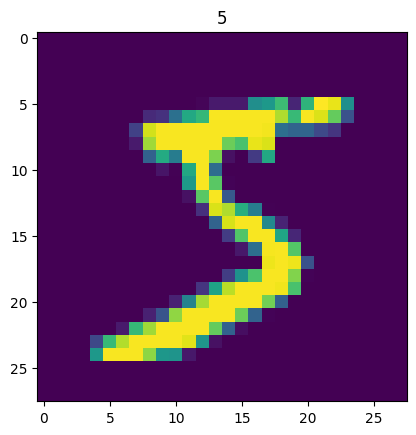

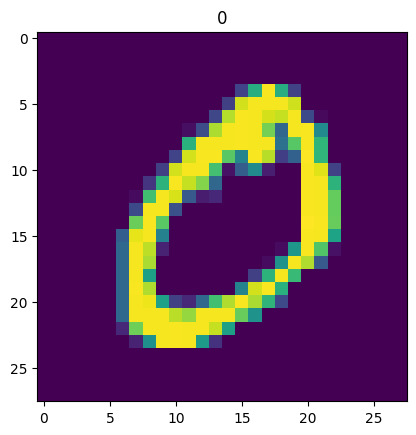

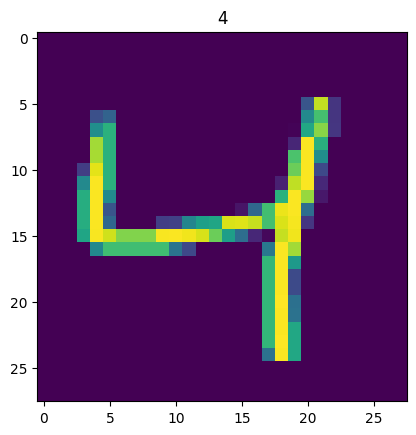

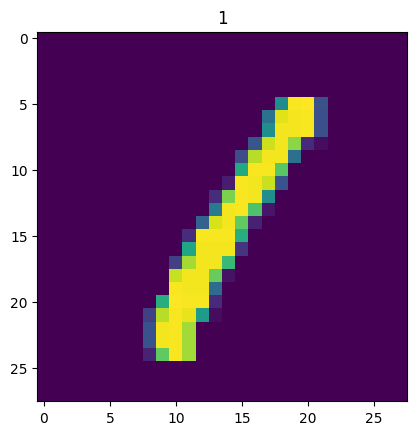

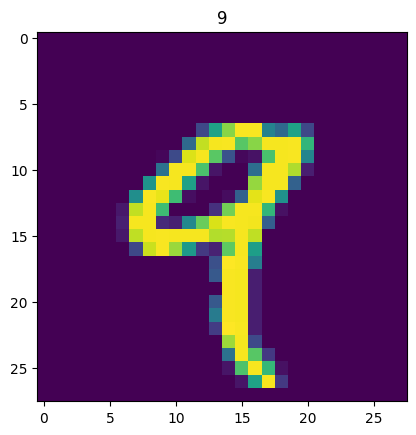

In [5]:
import matplotlib.pyplot as plt
it = 5
for i in range(it):
  img , label = train_data[i]
  plt.figure()
  plt.imshow(img.squeeze())
  plt.title(label)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_loader = DataLoader(dataset = train_data,
                          batch_size = BATCH_SIZE,
                          shuffle = True)
test_loader = DataLoader(dataset = test_data,
                          batch_size = BATCH_SIZE,
                          shuffle = False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
device = 'cuda' if t.cuda.is_available() else 'cpu'
num_classes = train_data.classes

In [8]:
class convomodel(nn.Module):
  def __init__(self, input : int , hidden : int , output : int):
    super().__init__()
    self.block1_layer = nn.Sequential(nn.Conv2d(in_channels = input , out_channels=hidden,kernel_size=2 , stride=1 , padding=1),
                                      nn.ReLU(),
                                      nn.Conv2d(in_channels=hidden , out_channels=hidden,kernel_size=3 , stride=1 , padding=1),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size=2))

    self.block2_layer = nn.Sequential(nn.Conv2d(in_channels = hidden , out_channels=hidden,kernel_size=2 , stride=1 , padding=1),
                                      nn.ReLU(),
                                      nn.Conv2d(in_channels=hidden , out_channels=hidden,kernel_size=3 , stride=1 , padding=1),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size=2))
    self.outblock_layer = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=hidden * 7 * 7 , out_features=output))

  def forward(self , x):
    x = self.block1_layer(x)
    # print(x.shape)
    x = self.block2_layer(x)
    # print(x.shape)
    x = self.outblock_layer(x)
    return x

In [9]:
t.manual_seed(42)
# t.cuda.manual_seed(42)
model_0 = convomodel(input = 1 , hidden = 10 , output= len(num_classes)).to(device)
model_0

convomodel(
  (block1_layer): Sequential(
    (0): Conv2d(1, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2_layer): Sequential(
    (0): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (outblock_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [10]:
!pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [11]:
import torchmetrics
from torchmetrics import Accuracy
from tqdm.auto import tqdm
from timeit import default_timer as dt

In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(model_0.parameters() , lr = 0.1)
acc_fn = Accuracy(task = 'multiclass' , num_classes= len(num_classes)).to(device)

In [13]:
def train_model(model : t.nn.Module,
                data : t.utils.data.dataloader,
                loss_fn : t.nn.Module,
                optimizer : t.optim.Optimizer,
                acc_fn : torchmetrics.Accuracy):
  t_loss = 0
  t_acc = 0
  model.train()
  for batch,(X,y) in enumerate(data):
    X , y = X.to(device) , y.to(device)
    y_logit = model(X)
    y_pred = t.softmax(y_logit , dim =1).argmax(dim =1)
    loss = loss_fn(y_logit , y)
    t_loss += loss
    t_acc += acc_fn(y_pred , y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 1600 ==0:
      print(f"Looked At : {batch * len(X)} / {len(data.dataset)} Samples")
  t_loss /= len(data)
  t_acc /= len(data)

  print(f"Loss : {t_loss} , Acc : {t_acc}")


In [14]:
def test_model(model : t.nn.Module,
                data : t.utils.data.dataloader,
                loss_fn : t.nn.Module,
                acc_fn : torchmetrics.Accuracy):

  model.eval()
  with t.inference_mode():
    t_loss = 0
    t_acc = 0
    for X,y in data:
      X , y = X.to(device) , y.to(device)
      y_logit = model(X)
      y_pred = t.softmax(y_logit , dim =1).argmax(dim =1)
      loss = loss_fn(y_logit , y)
      t_loss += loss
      t_acc += acc_fn(y_pred , y)
    t_loss /= len(data)
    t_acc /= len(data)
    print(f"Loss : {t_loss} , Acc : {t_acc}")


In [15]:
def get_time(start : float , end : float):
  total_time = end - start
  return total_time

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [16]:
t.manual_seed(42)
t.cuda.manual_seed(42)
start = dt()
epochs = 5
for epoch in tqdm(range(epochs)):
  print("Epoch----------")
  train_model(model = model_0 , data = train_loader , loss_fn=loss_fn ,optimizer= optimizer , acc_fn=acc_fn)
  test_model(model = model_0 , data = test_loader , loss_fn=loss_fn, acc_fn=acc_fn)
end = dt()
total_time = get_time(start , end)
print(f"Total_time : {total_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch----------
Looked At : 0 / 60000 Samples
Looked At : 51200 / 60000 Samples
Loss : 0.2691003978252411 , Acc : 0.9106000065803528
Loss : 0.07153158634901047 , Acc : 0.9779353141784668
Epoch----------
Looked At : 0 / 60000 Samples
Looked At : 51200 / 60000 Samples
Loss : 0.07783664762973785 , Acc : 0.9757000207901001
Loss : 0.05884788930416107 , Acc : 0.9812300205230713
Epoch----------
Looked At : 0 / 60000 Samples
Looked At : 51200 / 60000 Samples
Loss : 0.06135623902082443 , Acc : 0.9809333682060242
Loss : 0.0551297664642334 , Acc : 0.9810303449630737
Epoch----------
Looked At : 0 / 60000 Samples
Looked At : 51200 / 60000 Samples
Loss : 0.05389217287302017 , Acc : 0.9835000038146973
Loss : 0.04846518486738205 , Acc : 0.9828274846076965
Epoch----------
Looked At : 0 / 60000 Samples
Looked At : 51200 / 60000 Samples
Loss : 0.04821759834885597 , Acc : 0.9850000143051147
Loss : 0.042852673679590225 , Acc : 0.9853234887123108
Total_time : 107.23788529399997


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [18]:
def make_predicitions(model:t.nn.Module,
                      data:list,
                      device : t.device = device):
  preds = []
  model.to(device)
  model.eval()
  with t.inference_mode():
    for sample in data:
      sample = t.unsqueeze(sample , dim = 0).to(device)
      y_logit = model(sample)
      y_pred = t.softmax(y_logit.squeeze() , dim = 0)
      preds.append(y_pred)
  return t.stack(preds)


In [20]:
import random
random.seed(42)
t_img = []
t_label = []
for sample , data in random.sample(list(test_data) , k=9):
  t_img.append(sample)
  t_label.append(data)
t_img[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '2')

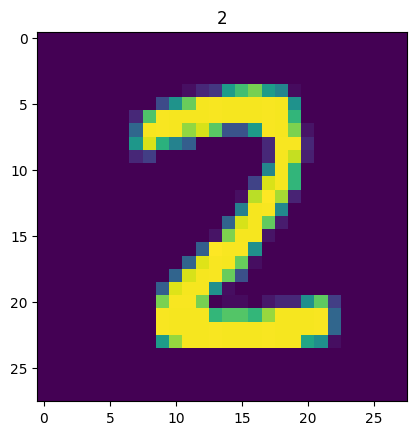

In [24]:
plt.imshow(t_img[0].squeeze().cpu())
plt.title(t_label[0])

In [27]:
pred_prob = make_predicitions(model= model_0, data = t_img)
pred_prob[:2]

tensor([[1.7193e-11, 2.8899e-09, 1.0000e+00, 2.7406e-08, 1.6186e-19, 2.1679e-16,
         6.9873e-15, 1.6007e-10, 4.4702e-07, 3.5612e-12],
        [1.7104e-06, 9.9380e-01, 2.5666e-05, 7.0729e-06, 7.8880e-05, 6.0181e-05,
         9.6591e-04, 4.4249e-05, 8.5088e-04, 4.1609e-03]], device='cuda:0')

In [33]:
preds = pred_prob.argmax(dim =1)
preds

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1], device='cuda:0')

In [32]:
t_label

[2, 1, 2, 4, 6, 6, 4, 9, 1]

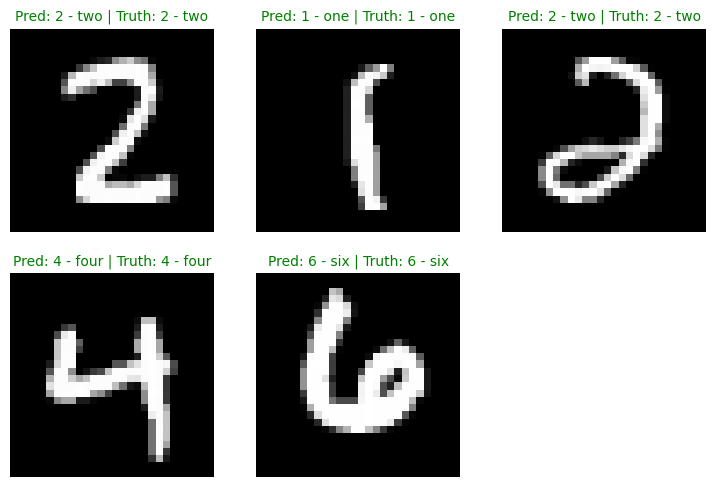

In [36]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(t_img[:5]):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = num_classes[preds[i]]

  # Get the truth label (in text form)
  truth_label = num_classes[t_label[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [37]:
y_pred = []
model_0.eval()
with t.inference_mode():
  for X,y in tqdm(test_loader , desc="Decision Pending..."):
    X , y = X.to(device) , y.to(device)
    y_log = model_0(X)
    y_fpred = t.softmax(y_log.squeeze(), dim = 0).argmax(dim = 1)
    y_pred.append(y_fpred)
# print(y_pred)
y_pred_t = t.cat(y_pred)
y_pred_t[:5]

Decision Pending...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 4], device='cuda:0')

In [38]:
from torchmetrics import ConfusionMatrix
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

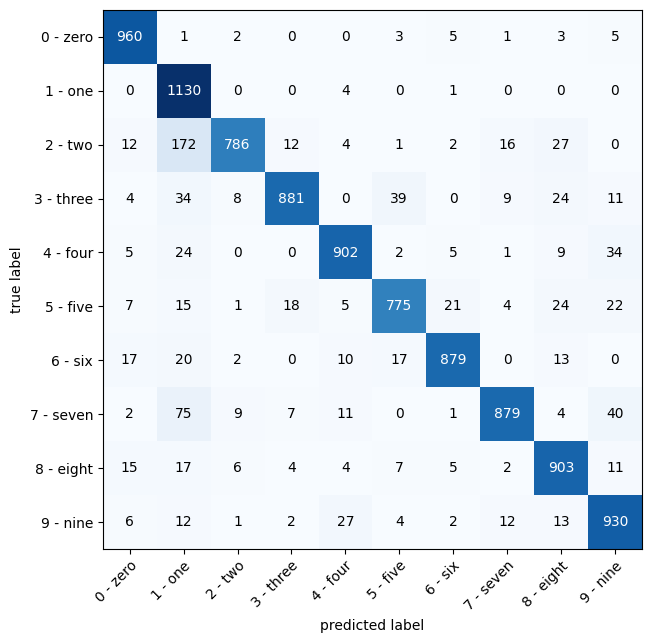

In [40]:
confmat = ConfusionMatrix(task="multiclass",num_classes = len(num_classes))
confmat_tensor = confmat(preds = y_pred_t .cpu(),
                         target = test_data.targets)
fig , ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(), #due to matplotlob
                                 class_names = num_classes,
                                 figsize = (10,7))


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [41]:
random_tensor = t.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [42]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


In [43]:
# Download FashionMNIST train & test
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

100%|██████████| 26421880/26421880 [00:02<00:00, 12642294.98it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 201039.48it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3745472.57it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20801808.28it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000, 10000)

In [44]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = fashion_mnist_train.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [45]:
# Turn FashionMNIST datasets into dataloaders
from torch.utils.data import DataLoader

fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train,
                                            batch_size=32,
                                            shuffle=True)

fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test,
                                           batch_size=32,
                                           shuffle=False)

len(fashion_mnist_train_dataloader), len(fashion_mnist_test_dataloader)

(1875, 313)

In [47]:
# model_2 is the same architecture as MNIST_model
model_2 = convomodel(input =1,
                      hidden =10,
                      output =10).to(device)
model_2

convomodel(
  (block1_layer): Sequential(
    (0): Conv2d(1, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2_layer): Sequential(
    (0): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (outblock_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [48]:
# Setup loss and optimizer
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = t.optim.SGD(model_2.parameters(), lr=0.1)

In [49]:
t.manual_seed(42)
t.cuda.manual_seed(42)
start = dt()
epochs = 5
for epoch in tqdm(range(epochs)):
  print("Epoch----------")
  train_model(model = model_2 , data = fashion_mnist_train_dataloader , loss_fn=loss_fn ,optimizer= optimizer , acc_fn=acc_fn)
  test_model(model = model_2 , data = fashion_mnist_test_dataloader , loss_fn=loss_fn, acc_fn=acc_fn)
end = dt()
total_time = get_time(start , end)
print(f"Total_time : {total_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch----------
Looked At : 0 / 60000 Samples
Looked At : 51200 / 60000 Samples
Loss : 0.7456536293029785 , Acc : 0.7259666919708252
Loss : 0.40556058287620544 , Acc : 0.8526357412338257
Epoch----------
Looked At : 0 / 60000 Samples
Looked At : 51200 / 60000 Samples
Loss : 0.37602469325065613 , Acc : 0.8647666573524475
Loss : 0.3517396152019501 , Acc : 0.8697084784507751
Epoch----------
Looked At : 0 / 60000 Samples
Looked At : 51200 / 60000 Samples
Loss : 0.33451002836227417 , Acc : 0.8790500164031982
Loss : 0.3348848521709442 , Acc : 0.8769968152046204
Epoch----------
Looked At : 0 / 60000 Samples
Looked At : 51200 / 60000 Samples
Loss : 0.31317952275276184 , Acc : 0.8855167031288147
Loss : 0.33009013533592224 , Acc : 0.8793929815292358
Epoch----------
Looked At : 0 / 60000 Samples
Looked At : 51200 / 60000 Samples
Loss : 0.2984831631183624 , Acc : 0.8916333317756653
Loss : 0.30821436643600464 , Acc : 0.8864816427230835
Total_time : 73.88575635899997


In [50]:
import random
random.seed(42)
t_img = []
t_label = []
for sample , data in random.sample(list(fashion_mnist_test) , k=9):
  t_img.append(sample)
  t_label.append(data)
t_img[0].shape

torch.Size([1, 28, 28])

In [51]:
pred_prob = make_predicitions(model= model_2, data = t_img)
pred_prob[:2]

tensor([[8.2131e-07, 1.8373e-08, 1.9341e-07, 1.8195e-08, 6.8179e-09, 9.9842e-01,
         2.4913e-07, 3.0336e-06, 1.6362e-04, 1.4122e-03],
        [1.1509e-01, 6.4808e-01, 2.1797e-04, 4.5302e-02, 2.3681e-03, 1.3225e-04,
         1.8578e-01, 3.5821e-04, 1.2088e-03, 1.4660e-03]], device='cuda:0')

In [52]:
preds = pred_prob.argmax(dim = 1)
preds

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1], device='cuda:0')

In [53]:
t_label

[5, 1, 7, 4, 3, 0, 4, 7, 1]

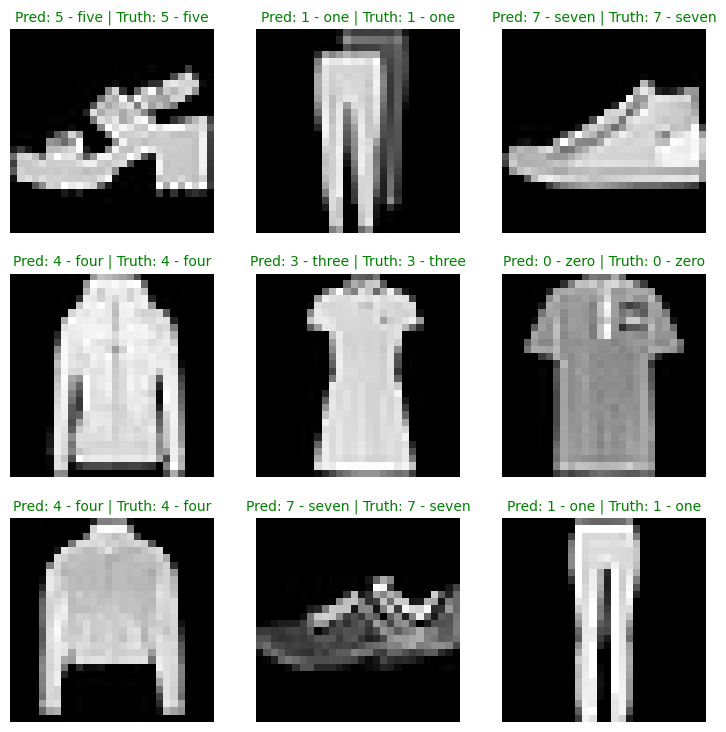

In [55]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(t_img):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = num_classes[preds[i]]

  # Get the truth label (in text form)
  truth_label = num_classes[t_label[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);